Варіант 3
---
Виконати box-фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз.

In [44]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
source_path = "/content/drive/MyDrive/CV_images"

In [47]:
def read_image(name):
  return np.array(Image.open(source_path + name).convert("L"))

In [48]:
high_contrast = read_image("/high_contrast.jpg")
low_contrast = read_image("/low_contrast.jpg")
high_detailing = read_image("/high_detailing.jpg")
low_detailing = read_image("/low_detailing.jpeg")

In [49]:
def box_filter(img, kernel_size):
  
    pad_size = kernel_size // 2
    
    padded_img = np.pad(img, (pad_size, pad_size), mode='edge')
    
    filtered_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            pixel_sum = np.sum(neighborhood)
            pixel_avg = pixel_sum / (kernel_size * kernel_size)
            filtered_img[i, j] = pixel_avg
            
    return filtered_img

In [50]:
kernel_sizes = [3, 5, 10, 15]

def filtered_list(image_name):
  return [box_filter(image_name, kernel_size) for kernel_size in kernel_sizes]

In [51]:
filtered_low_contrast_images = filtered_list(low_contrast)
filtered_high_contrast_images = filtered_list(high_contrast)
filtered_low_detailing_images = filtered_list(low_detailing)
filtered_high_detailing_images = filtered_list(high_detailing)

In [52]:
def show_difference(img_name, original_image, filtered_images):

  for i, kernel_size in enumerate(kernel_sizes):
      plt.figure(figsize=(50, 20))
      plt.subplot(2, 4, 1)
      plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), cmap="gray")
      plt.title("Original " + img_name)
      plt.axis("off")
      plt.subplot(2, 4, 2)
      plt.imshow(filtered_images[i], cmap="gray")
      plt.title("Filtered " + img_name + ", kernel size  - " + str(kernel_size))
      plt.axis("off")

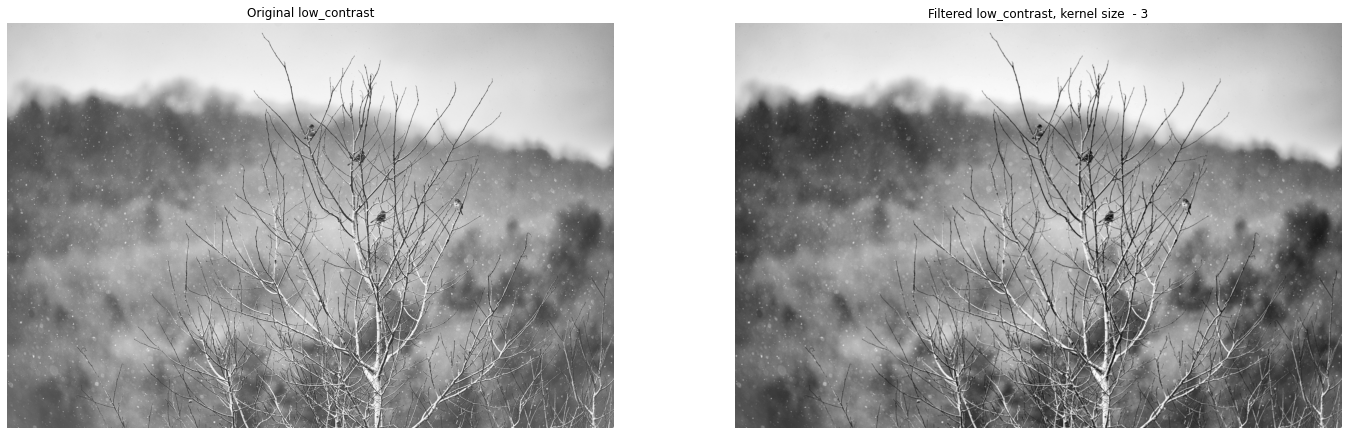

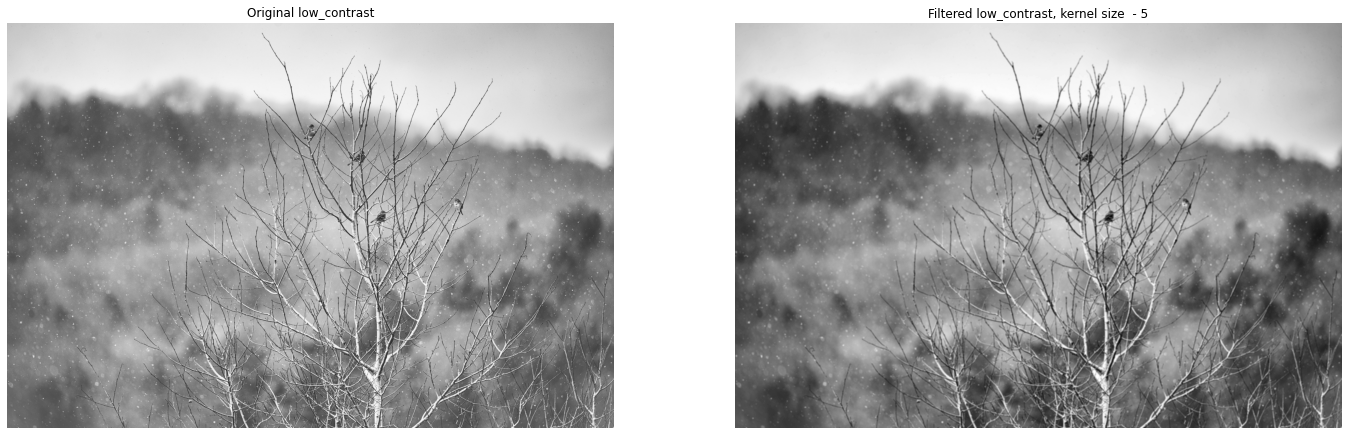

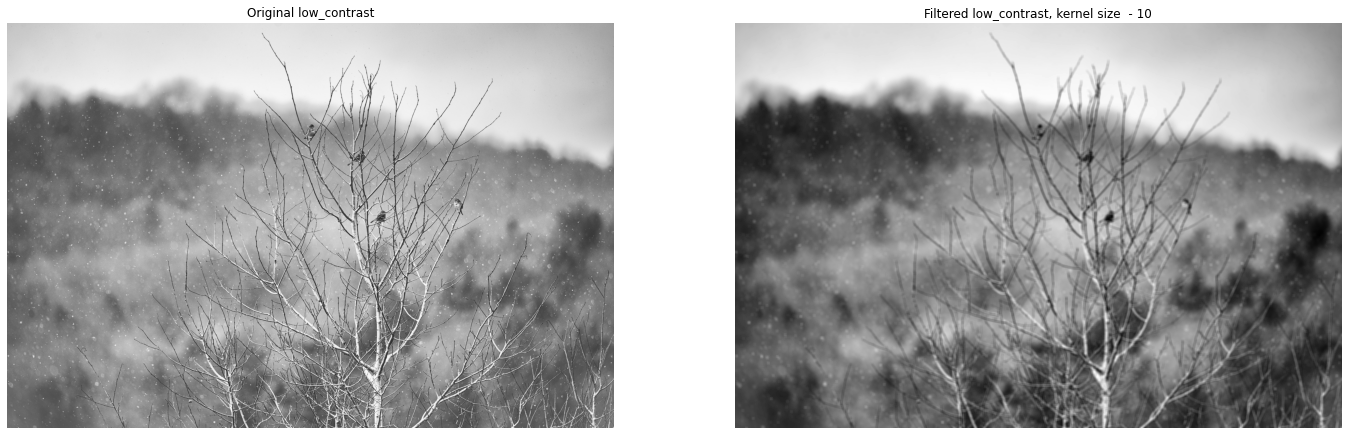

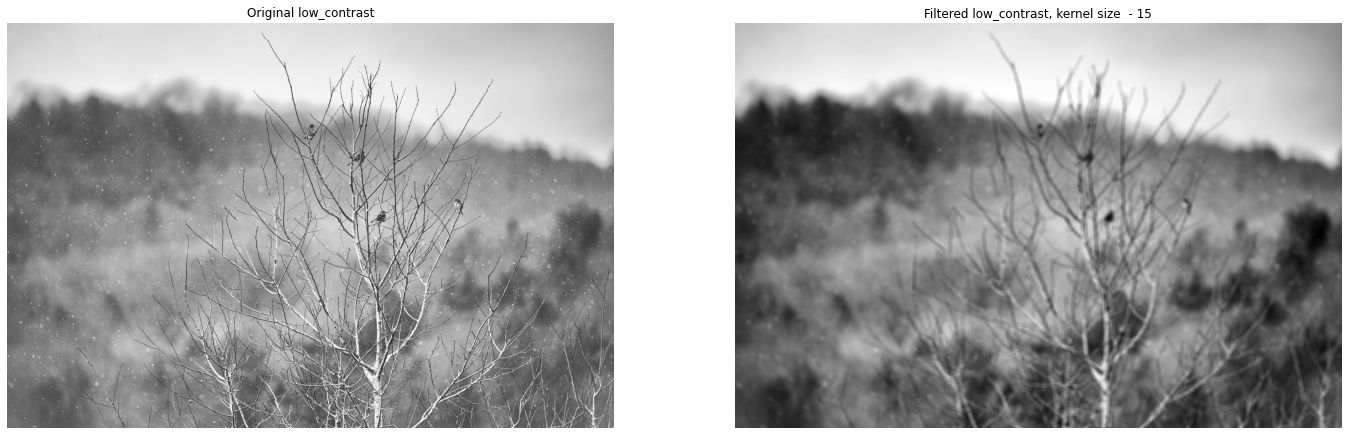

In [53]:
show_difference("low_contrast", low_contrast, filtered_low_contrast_images)

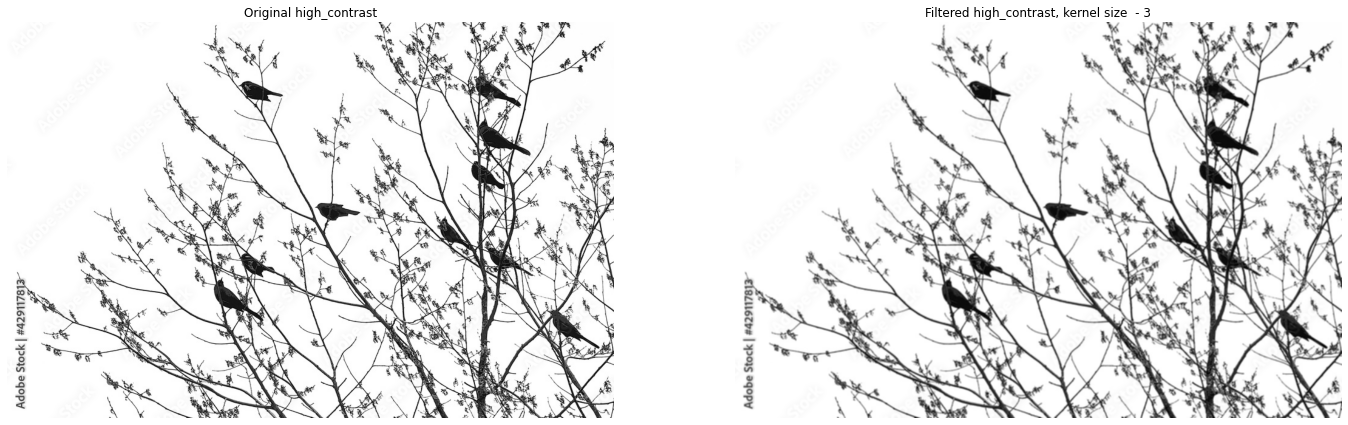

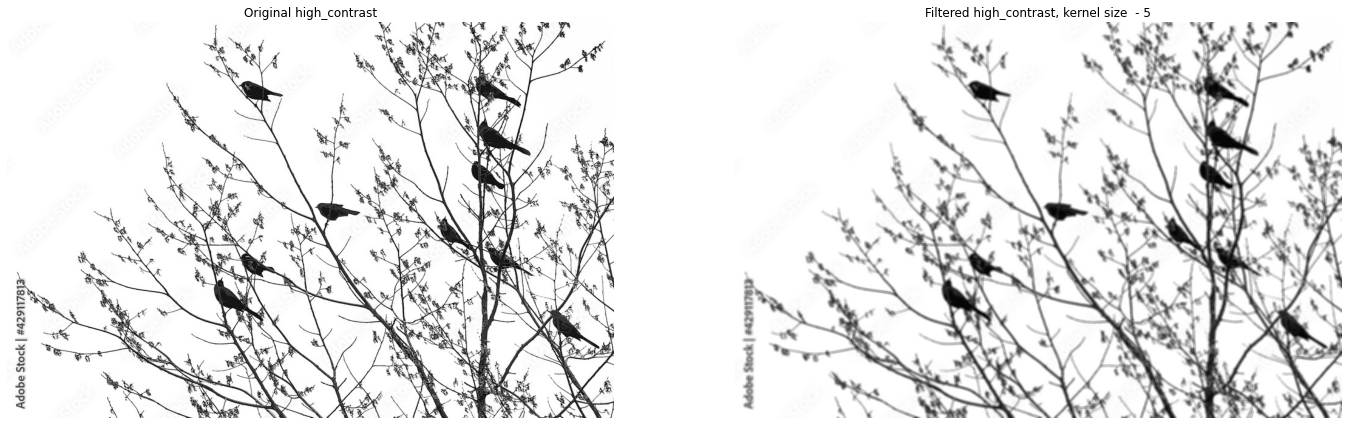

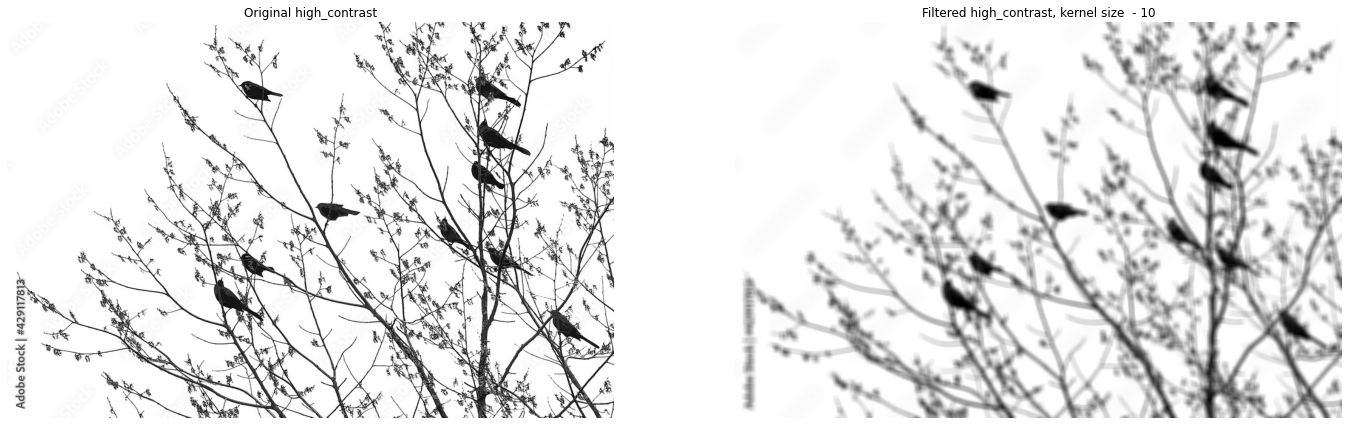

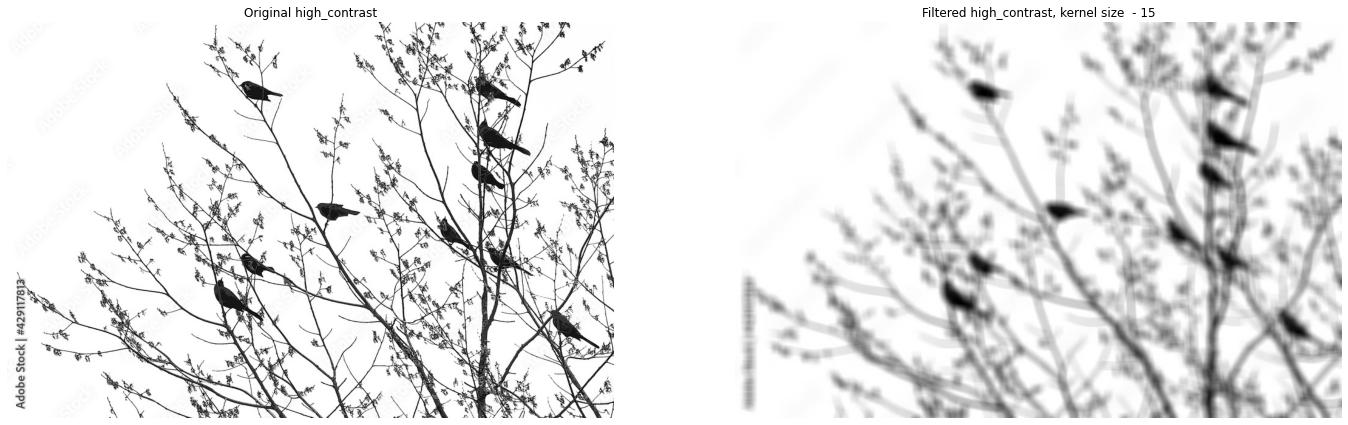

In [54]:
show_difference("high_contrast", high_contrast, filtered_high_contrast_images)

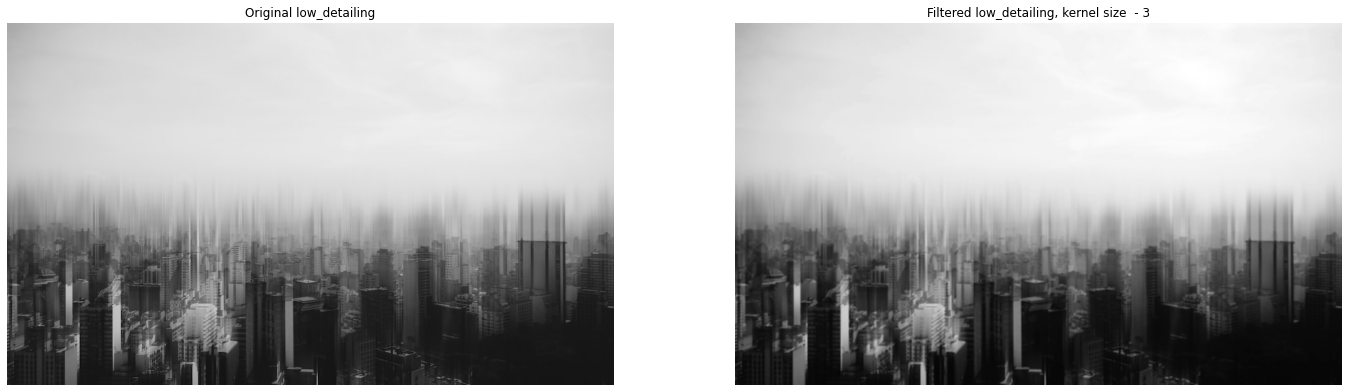

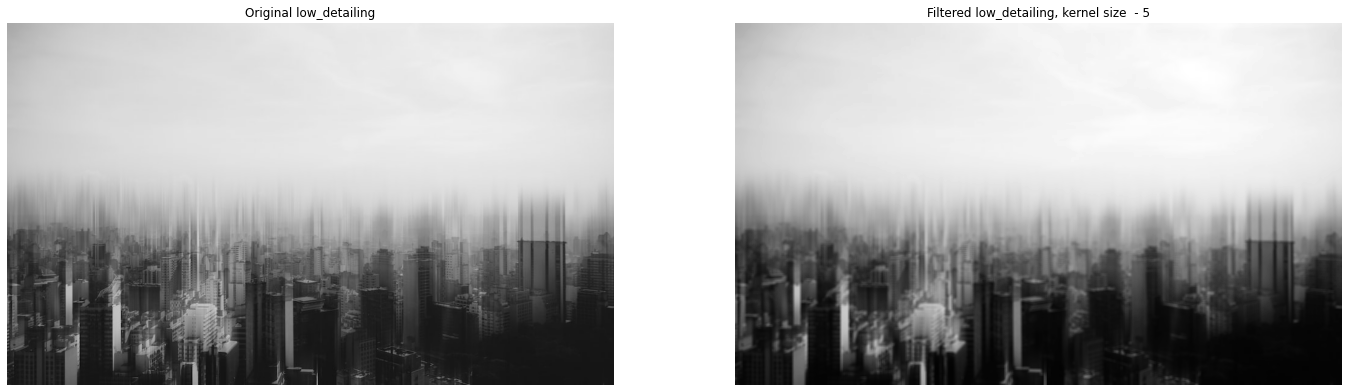

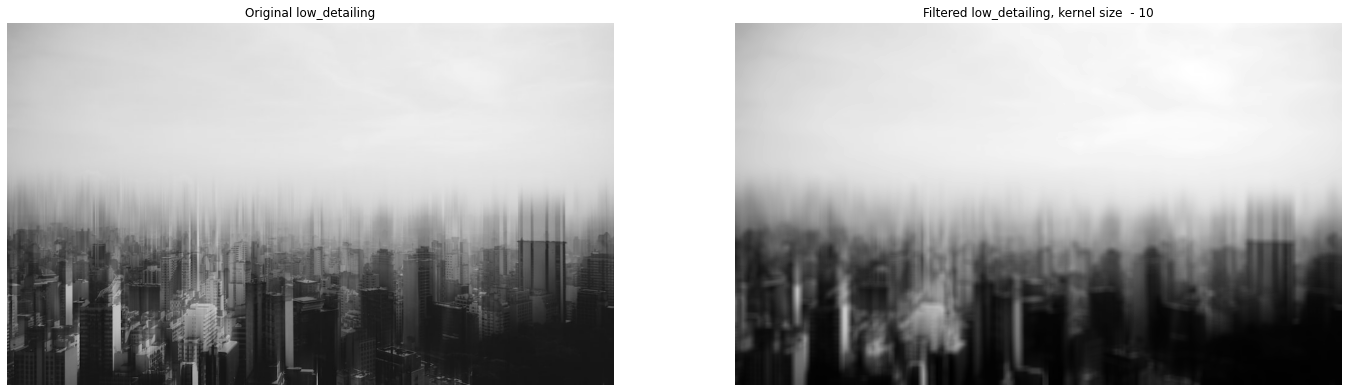

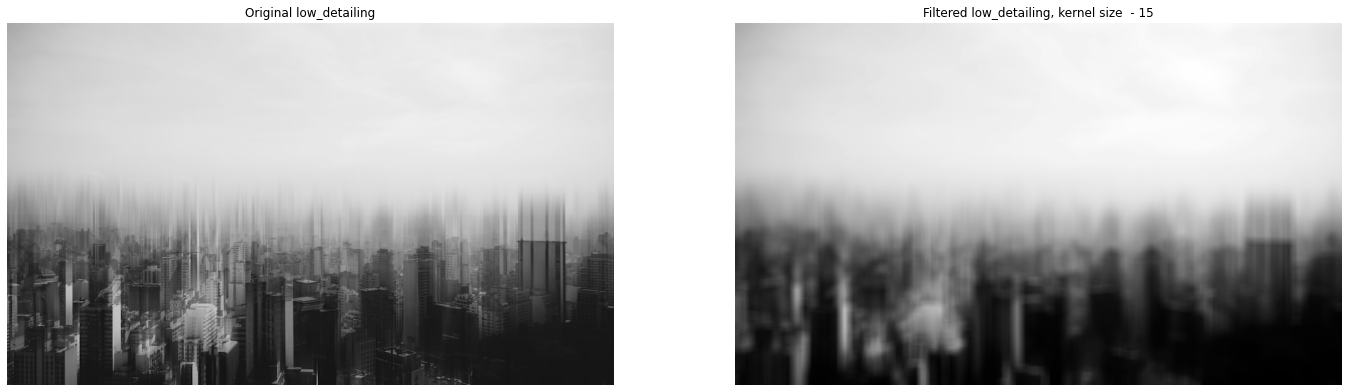

In [55]:
show_difference("low_detailing", low_detailing, filtered_low_detailing_images)

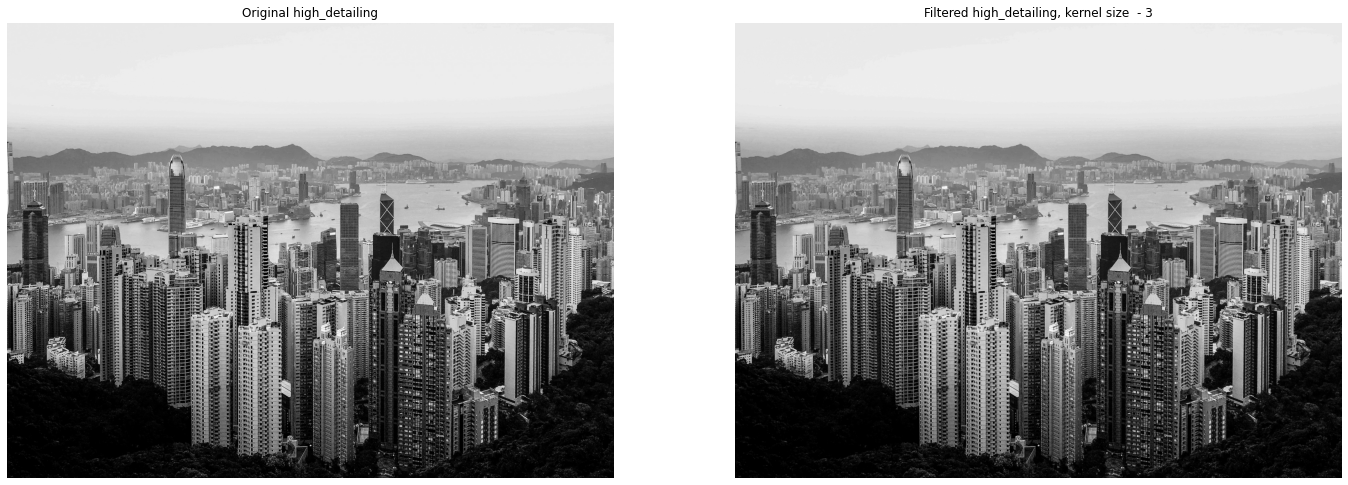

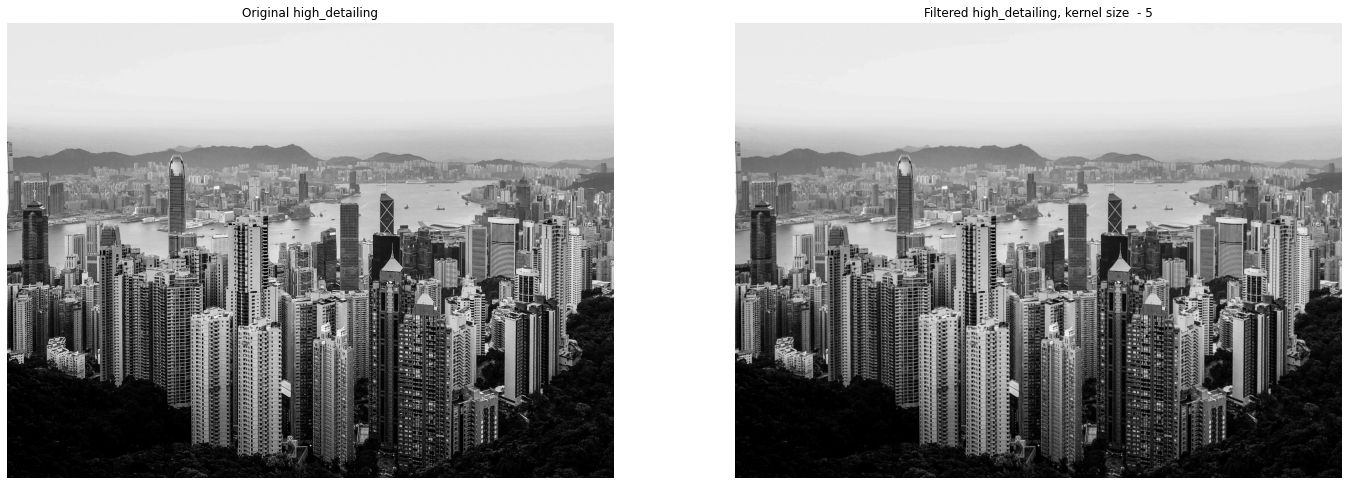

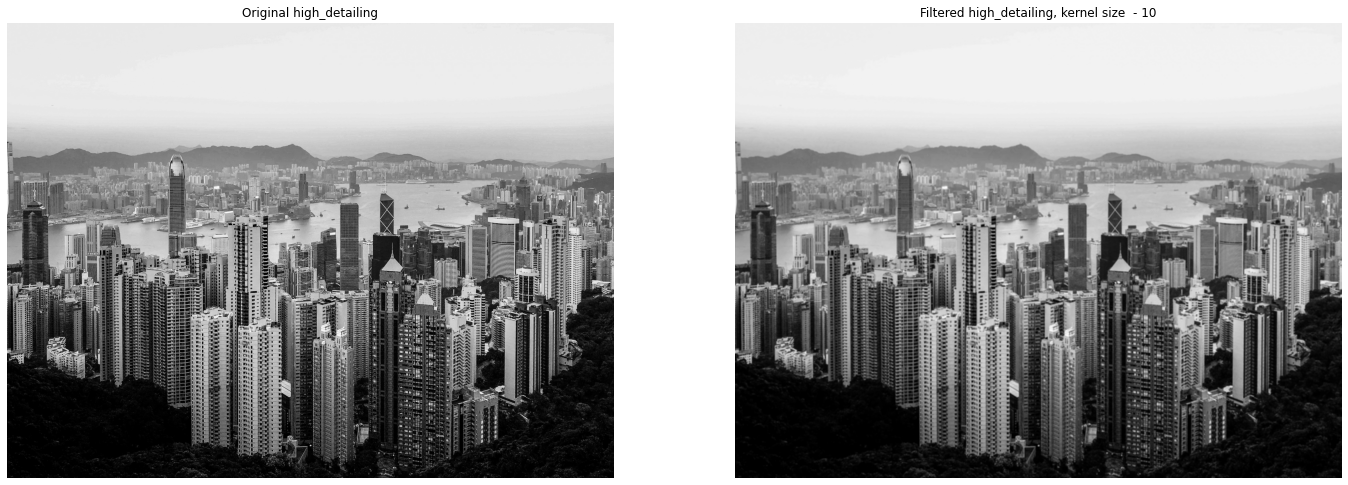

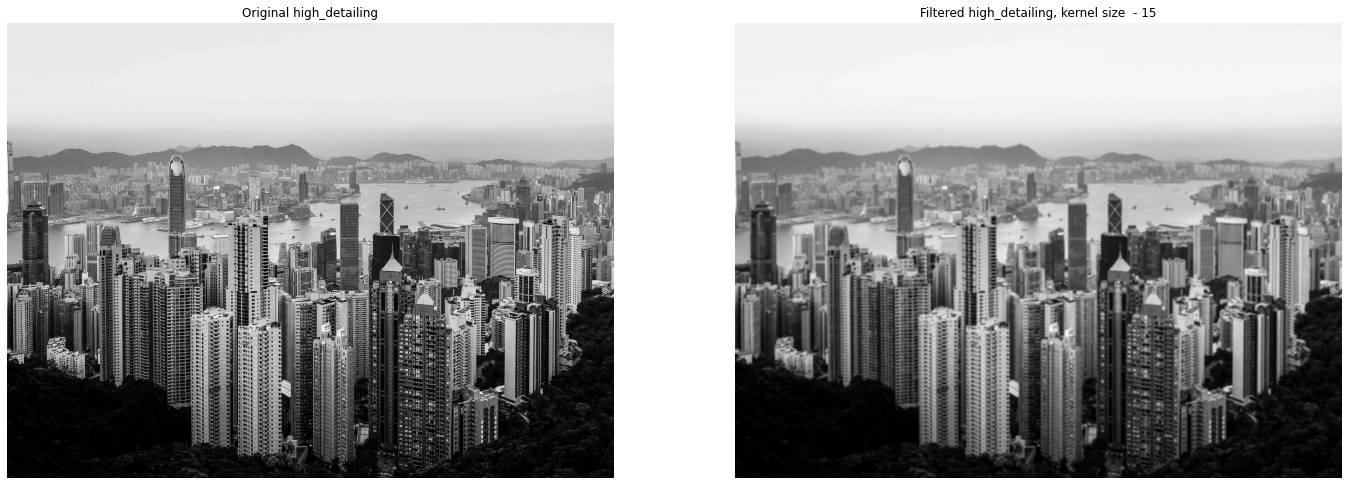

In [56]:
show_difference("high_detailing", high_detailing, filtered_high_detailing_images)